In [55]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as col

In [3]:
uploaded = files.upload()

Saving smokers[1].npz to smokers[1].npz


In [19]:
data = np.load('smokers[1].npz')

In [20]:
print( np.array(list(data.keys())))

['data']


In [22]:
data = data['data']
print(data)

[[19  0 87]
 [ 8  0 77]
 [ 8  0 66]
 ...
 [14  0 54]
 [ 2  0 77]
 [14  1 45]]


In [38]:
a = np.delete(data,1,1)
a = np.delete(a,0,1)
print(a)

[[87]
 [77]
 [66]
 ...
 [54]
 [77]
 [45]]


(array([  35.,  421., 1895., 2659., 2386., 4105., 3605., 2126., 2053.,
         715.]),
 array([ 38. ,  44.2,  50.4,  56.6,  62.8,  69. ,  75.2,  81.4,  87.6,
         93.8, 100. ]),
 <BarContainer object of 10 artists>)

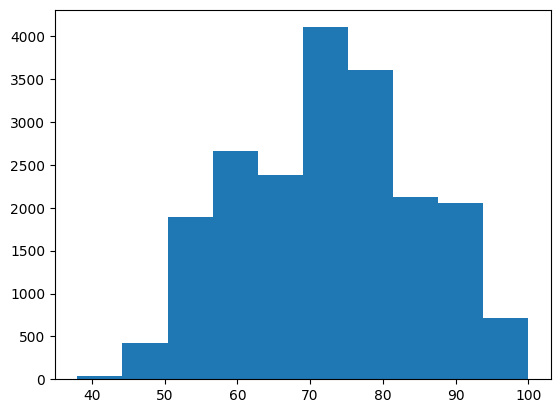

In [39]:
plt.hist(a)

<ipython-input-63-feac08764810>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a.flatten(),bins=10, norm_hist=True)


<Axes: ylabel='Density'>

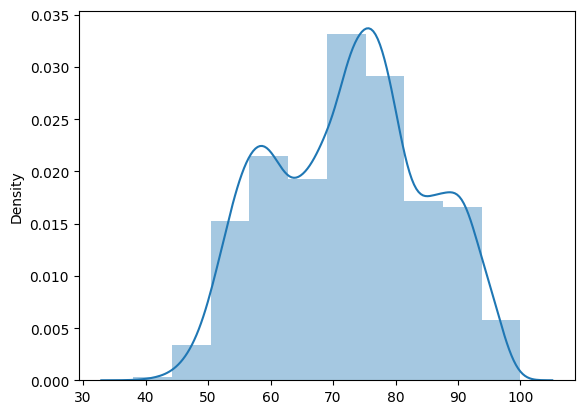

In [63]:
sns.distplot(a.flatten(),bins=10, norm_hist=True)

In [80]:
len(data)

20000

<BarContainer object of 20 artists>

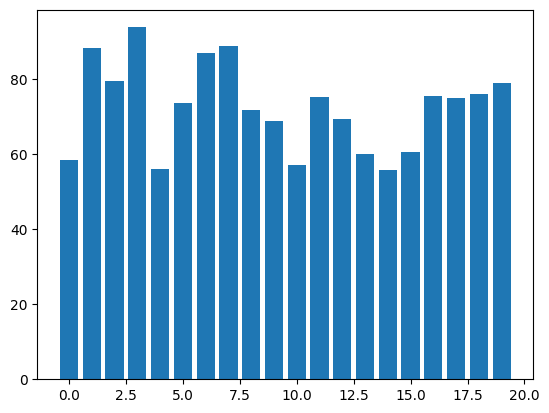

In [99]:
countriesfrag = []
countriesav = []


for i in range(20):
  all = data[data[:,0] == i]
  size = len(all)
  smoke = all[all[:,1]==1]
  smokesize = len(smoke)
  live = np.sum(all[:,2])
  frac = smokesize/size
  av = live/size
  countriesav.append([i,av])
  countriesfrag.append([i,frac])


countriesav = np.array(countriesav)
x = countriesav[:,0]
y = countriesav[:,1]






plt.bar(x,y)



<BarContainer object of 20 artists>

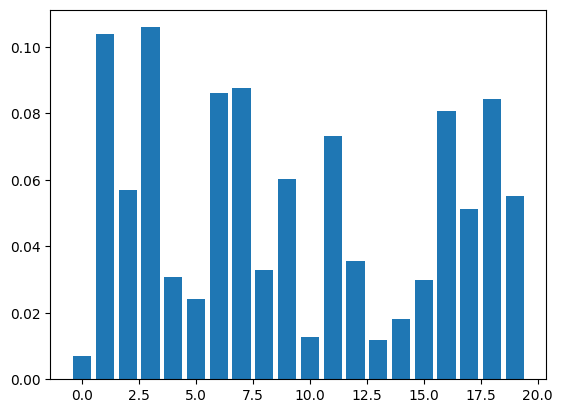

In [100]:
countriesfrag = np.array(countriesfrag)
xfrag = countriesfrag[:,0]
yfrag = countriesfrag[:,1]

plt.bar(xfrag,yfrag)

In [101]:
smokeav = []
nosmokeav = []


for i in range(20):
  all = data[data[:,0] == i]
  smoke = all[all[:,1]==1]
  smokesize = len(smoke)
  smokesum = np.sum(smoke[:,2])
  nosmoke = all[all[:,1]==0]
  nosmokesize = len(nosmoke)
  nosmokesum = np.sum(nosmoke[:,2])
  smokeav.append([i,smokesum/smokesize])
  nosmokeav.append([i,nosmokesum/nosmokesize])


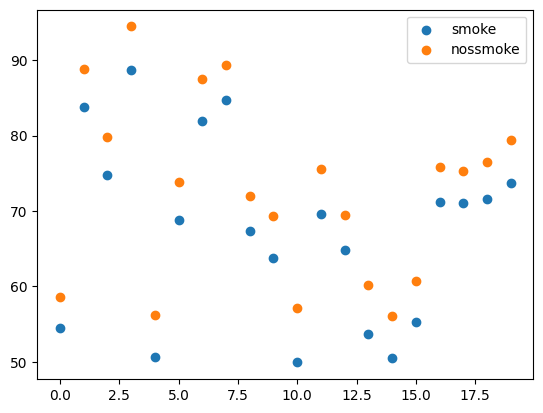

In [107]:
smokeav = np.array(smokeav)
xfrag = smokeav[:,0]
yfrag = smokeav[:,1]

nosmokeav = np.array(nosmokeav)
x = nosmokeav[:,0]
y = nosmokeav[:,1]

plt.scatter(xfrag,yfrag,label="smoke")
plt.scatter(x,y,label="nossmoke")
plt.legend()

In [108]:
uploaded2 = files.upload()

Saving salaries[1].npz to salaries[1].npz


In [110]:
data2 = np.load('salaries[1].npz')

In [114]:
print( np.array(list(data.keys())))

['salaries' 'inflation_factors']


In [113]:
data2["inflation_factors"]

array([1.3, 1.1, 1.7, 1.5, 1.6, 2.3, 2.6, 0.3, 1.1, 2.1, 2. , 1.4, 1. ,
       0.5, 0.5, 1.5, 1.8, 1.4, 0.5])

1.29999999999999
1.429999999999976
2.4309999999999454
3.6464999999998944
5.834399999999836
13.41911999999957
34.88971199999891
10.466913599999295
11.513604959999117
24.178570415998042
48.35714083199613
67.69999716479464
67.6999971647947
33.84999858239662
16.92499929119795
25.387498936796757
45.697498086234205
63.976497320727944
31.98824866036329


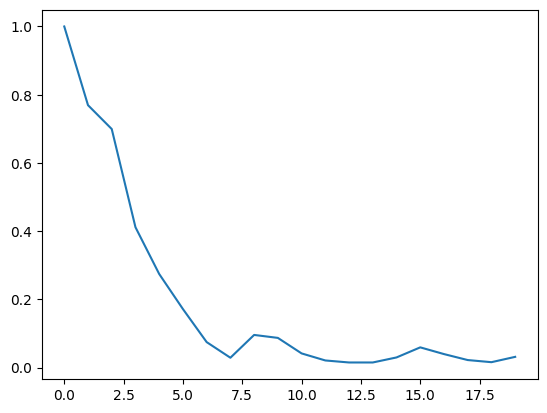

In [121]:

values = []
values.append(1.0)
for i in range(19):
  values.append(values[i]*data2["inflation_factors"][i])
  print(values[i+1])

plt.plot(1/np.array(values))

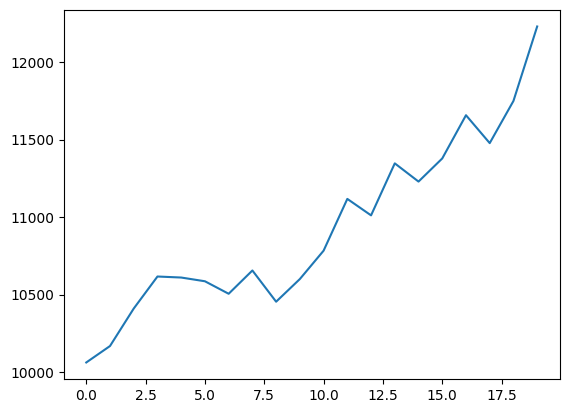

In [126]:
plt.plot(data2["salaries"][0])